# Importing Libraries

In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [ ]:
#The dataset is tab-separated and has no headers so I used seperator and header
df = pd.read_csv("/content/SMSSpamCollection",sep="\t",header=None,names=["label", "text"])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Pre processing textual data

In [ ]:
#counting the values of ham and spam in the file
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
#function to clean text
def clean_text(text):
    text = text.lower()    #converting everything to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Removing numbers and special characters
    return text

df['clean_text'] = df['text'].apply(clean_text)
df

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...
5568,ham,Will ü b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


In [ ]:
# Converting text into a table of word counts (Bag of Words)
vectorizer = CountVectorizer()
x_nb = vectorizer.fit_transform(df['clean_text'])
y_nb = df['label']
df

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...
5568,ham,Will ü b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


# Train test split

In [ ]:
# Splitting the data into 80% for training and 20% for testing.
x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(x_nb, y_nb, test_size=0.2, random_state=1234)

# Naive Bayes as a baseline model

In [ ]:
#training the Naive Bayes model
Mnb = MultinomialNB()
Mnb.fit(x_train_nb , y_train_nb)

MultinomialNB()

In [ ]:
#making predictions using the model with the test data
pred_nb = Mnb.predict(x_test_nb)

# Evaluation Metrics

In [ ]:
#calculating the accuracy and detailed metrics of the model
accuracy = accuracy_score(y_test_nb, pred_nb)
print("Accuracy:", accuracy)

print(classification_report(y_test_nb, pred_nb))
print(confusion_matrix(y_test_nb, pred_nb))


Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       962
        spam       0.86      0.94      0.90       153

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[939  23]
 [  9 144]]


# Logistic regression

In [ ]:
# using TF-IDF which gives more importance to meaningful words
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(df["clean_text"])
y = df["label"]


In [ ]:
#splitting the data into train and test data for logistic regression
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_tfidf, df['label'], test_size=0.2, random_state=1234)

#training the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_lr, y_train_lr)




LogisticRegression(max_iter=1000)

In [ ]:
#making predictions for the logistic regression model
pred_lr = lr_model.predict(x_test_lr)

In [ ]:
#Prints the overall accuracy and detailed metrics for lr .

print("Accuracy:", accuracy_score(y_test_lr, pred_lr))
print("\nClassification Report:\n")
print(classification_report(y_test_lr, pred_lr))


Accuracy: 0.9506726457399103

Classification Report:

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       962
        spam       0.98      0.65      0.78       153

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



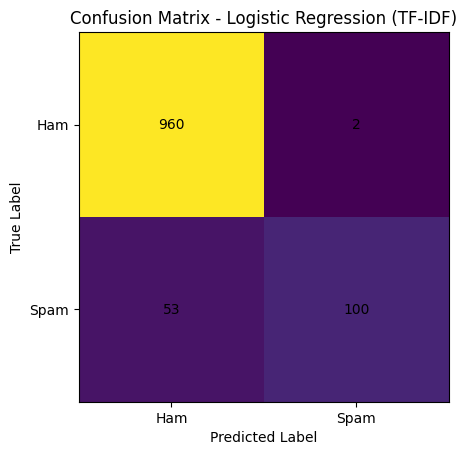

In [ ]:
#Visualizing model performance using a confusion matrix
cm_lr = confusion_matrix(y_test_lr, pred_lr)

plt.figure()
plt.imshow(cm_lr)
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Ham", "Spam"])
plt.yticks([0, 1], ["Ham", "Spam"])

for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        plt.text(j, i, cm_lr[i, j], ha="center", va="center")

plt.show()


#NEURAL NETWORK (deep learning model)

In [ ]:
#Installing the Gensim library
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 70.3 MB/s eta 0:00:00


In [ ]:
# Neural Network tools
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#Breaking sentences into lists of words (Tokens)
df['tokens'] = df['clean_text'].apply(lambda x: x.split())

#creating Word Embeddings
w2v_model = Word2Vec(
    sentences=df["tokens"],
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

In [ ]:
# Converting each message into a single vector by averaging its word vectors
def document_vector(tokens, model):

    #Getting vectors for words that exist in the Word2Vec model
    vectors = [model.wv[word] for word in tokens if word in model.wv]

    # Return a zero vector if no words are found
    if len(vectors) == 0:
        return np.zeros(model.vector_size)

    # Averaging all the word vectors together
    return np.mean(vectors, axis=0)

#Applyying the vectorization to all messages in the dataset
x_w2v = np.array([
    document_vector(tokens, w2v_model)
    for tokens in df["tokens"]
])


In [ ]:
#Label encoding to turn ham into 0 and spam into 1.
le = LabelEncoder()
y_nn = le.fit_transform(df["label"])


In [ ]:
#splitting the data into train and test data for neural network
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(x_w2v, y_nn, test_size=0.2, random_state=1234)

In [ ]:
#Building a sequential neural network by stacking layers
model = Sequential([
    Dense(128, activation="relu", input_shape=(100,)),  #relu is the math formula that helps the model learn complex patterns.
    Dropout(0.5), # preventing the model from memorizing specific messages
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")  #This gives us a percentage
])

#Compiling the model with optimizer, loss function, and evaluation metric
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#training the model
model.fit(
    x_train_nn, y_train_nn,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8379 - loss: 0.4471 - val_accuracy: 0.8587 - val_loss: 0.3948
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8682 - loss: 0.3842 - val_accuracy: 0.8587 - val_loss: 0.3845
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8576 - loss: 0.3919 - val_accuracy: 0.8587 - val_loss: 0.3585
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8685 - loss: 0.3427 - val_accuracy: 0.8587 - val_loss: 0.3068
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8689 - loss: 0.3045 - val_accuracy: 0.8610 - val_loss: 0.2524
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8943 - loss: 0.2398 - val_accuracy: 0.9148 - val_loss: 0.2117
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9065 - loss: 0.2352 - val_accuracy: 0.9081 - val_loss: 0.2168
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9199 - loss: 0.2121 - val_accuracy: 

In [ ]:
#testing the model on the 20% it has never seen before.
pred_nn = model.predict(x_test_nn)
y_pred = (pred_nn > 0.5).astype(int) # If the probability is higher than 0.5, label it as spam


print("Accuracy:", accuracy_score(y_test_nn, y_pred))
print(classification_report(y_test_nn, y_pred, target_names=["ham", "spam"]))


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.9300448430493273
              precision    recall  f1-score   support

         ham       0.96      0.96      0.96       962
        spam       0.73      0.77      0.75       153

    accuracy                           0.93      1115
   macro avg       0.85      0.86      0.86      1115
weighted avg       0.93      0.93      0.93      1115



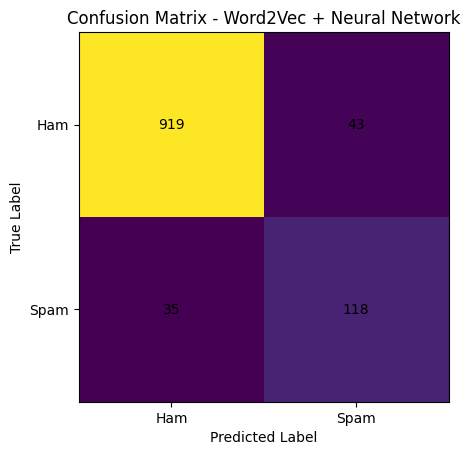

In [ ]:
# Creating and displaying a confusion matrix to evaluate the neural network’s predictions
cm = confusion_matrix(y_test_nn, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Word2Vec + Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Ham", "Spam"])
plt.yticks([0, 1], ["Ham", "Spam"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


#COMPARISON CHART


--- PERFORMANCE ANALYSIS TABLE ---
                 Model  Accuracy  Precision  Recall  F1-Score
0          Naive Bayes     0.971      0.862   0.941     0.900
1  Logistic Regression     0.951      0.980   0.654     0.784
2       Neural Network     0.930      0.733   0.771     0.752


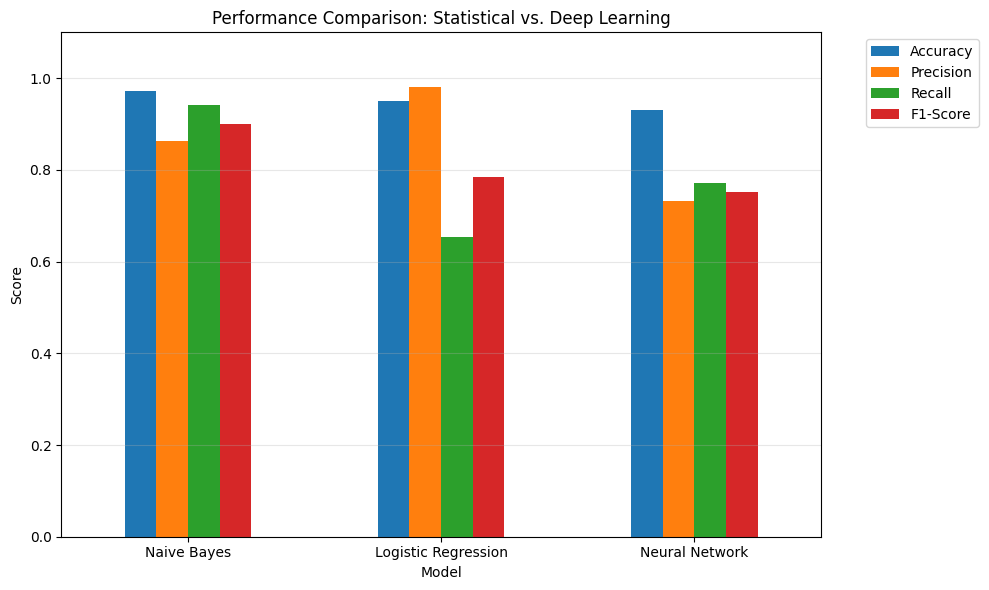

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

results = []

models_to_evaluate = [
    ('Naive Bayes', y_test_nb, pred_nb),
    ('Logistic Regression', y_test_lr, pred_lr),
    ('Neural Network', y_test_nn, y_pred)
]

for name, y_true, y_pred in models_to_evaluate:

    # Normalizing labels to binary format
    def normalize(labels):
        labels = np.array(labels).flatten()
        clean = []
        for x in labels:
            val = str(x).lower().strip()
            if val in ['spam', '1', '1.0']:
                clean.append(1)
            else:
                clean.append(0)
        return clean

    # Ensure true and predicted labels are consistent
    y_true_final = normalize(y_true)
    y_pred_final = normalize(y_pred)

    #Calculating accuracy
    acc = accuracy_score(y_true_final, y_pred_final)

    #Calculating evaluation metrics
    p, r, f1, _ = precision_recall_fscore_support(
        y_true_final,
        y_pred_final,
        average='binary',
        pos_label=1
    )

    #Save the results to list
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': p,
        'Recall': r,
        'F1-Score': f1
    })

# Creating comparison table
comparison_df = pd.DataFrame(results)

print("\n--- PERFORMANCE ANALYSIS TABLE ---")
print(comparison_df.round(3))

# Creating the comparison bar chart
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison: Statistical vs. Deep Learning')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()